In [1]:
import numpy as np
import random
#only for displaying info (look at playground section below)
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
# load train data
train_data = np.genfromtxt("data_train.csv", delimiter=",")

train_x = train_data[:, 1]
train_y = train_data[:, 2]


# delete nan's
train_x = train_x[~np.isnan(train_x)]
train_y = train_y[~np.isnan(train_y)]

In [3]:
def mean_squared_error(bias, slope, x, y):
    return 1/len(x) * np.sum((h_theta(bias, slope, x) - y)**2)

In [4]:
def h_theta(bias, slope, x):
    return bias + slope*x

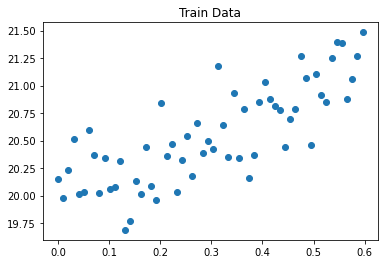

In [5]:
# train data visualization
fig, ax = plt.subplots()
plt.title("Train Data")
ax.scatter(train_x, train_y)
plt.show()

In [6]:
def gradien_descent_linear_regression(train_x, train_y, learning_rate, theta_tolerance, it_tolerance):
    theta_bias = random.uniform(0,1)
    theta_slope = random.uniform(0,1)
    
    MSE_start = mean_squared_error(theta_bias, theta_slope, train_x, train_y)
    info_dict = {
        'bias': list([theta_bias]),
        'slope' : list([theta_slope]),
        'MSE' : list([MSE_start])
    }
    
    for i in range(it_tolerance):
        
        sum_coefficient = learning_rate/len(train_x)
        
        theta_bias_cur = theta_bias - sum_coefficient * np.sum(h_theta(theta_bias, theta_slope, train_x) - train_y)
        theta_slope_cur = theta_slope - sum_coefficient * np.sum((h_theta(theta_bias, theta_slope, train_x) - train_y)*train_x)
        
        
        
        MSE = mean_squared_error(theta_bias_cur, theta_slope_cur, train_x, train_y)
        
        info_dict['bias'].append(theta_bias_cur)
        info_dict['slope'].append(theta_slope_cur)
        info_dict['MSE'].append(MSE)
        
        
        if abs(theta_bias_cur - theta_bias) < theta_tolerance and abs(theta_slope_cur - theta_slope) < theta_tolerance:
            return theta_bias_cur, theta_slope_cur, info_dict

       
        theta_bias = theta_bias_cur
        theta_slope = theta_slope_cur
                
    
    return theta_bias, theta_slope, info_dict

In [7]:
# playground 

#x and y data
train_x = train_x 
train_y = train_y

learning_rate = 0.01
theta_tolerance = 0.0001
iteration_tolerance = 10000


bias, slope, info = gradien_descent_linear_regression(train_x, train_y, learning_rate, theta_tolerance, iteration_tolerance)
df = pd.DataFrame(info, columns = ['bias', 'slope', 'MSE'])

# here you can see all the values
df.tail()

,bias,slope,MSE
8681,19.850522,2.33564,0.076941
8682,19.850553,2.33554,0.076939
8683,19.850584,2.33544,0.076937
8684,19.850614,2.33534,0.076935
8685,19.850645,2.33524,0.076933


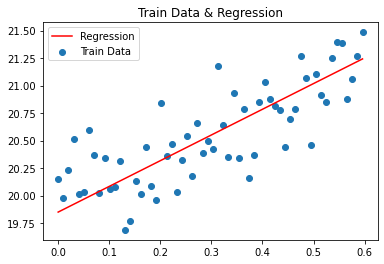

In [14]:
xs = np.array([np.min(train_x), np.max(train_x)])
ys = h_theta(bias, slope, xs)


fig, ax = plt.subplots()
plt.title("Train Data & Regression")
ax.scatter(train_x, train_y, label="Train Data")
ax.plot(xs,ys, "r",label="Regression")
ax.legend()

plt.show()

In [15]:
# load test data
test_data = np.genfromtxt("data_test.csv", delimiter=",")

test_x = test_data[:, 1]
test_y = test_data[:, 2]


test_x = test_x[~np.isnan(test_x)]
test_y = test_y[~np.isnan(test_y)]

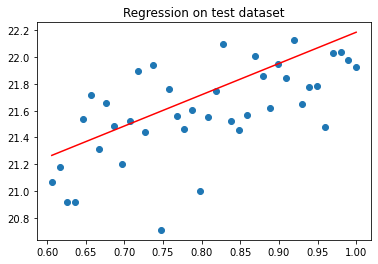

In [16]:
xt = np.array([np.min(test_x), np.max(test_x)])
yt = bias + slope*xt

fig, ax = plt.subplots()
plt.title("Regression on test dataset")
plt.plot(xt,yt, "r")
plt.scatter(test_x, test_y)
plt.show()

In [17]:
MSE = mean_squared_error(bias, slope, test_x, test_y)
print(F"MSE OF TEST DATA: {MSE}")

MSE OF TEST DATA: 0.09241396777079787


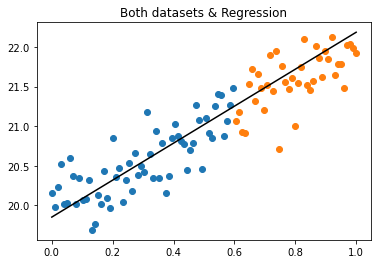

In [18]:

result_x = np.array([np.min([np.min(train_x), np.min(test_x)]), np.max([np.max(train_x), np.max(test_x)])])
result_y = bias + slope * result_x

plt.title("Both datasets & Regression")
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.plot(result_x, result_y, "k")
plt.show()